# Descente de Gradient et Fonction Quadratique

In [1]:
import torch 
import matplotlib.pyplot as plt

In [2]:
def f(x1, x2):
    return x1*x1 -0.5*x1*x2 - 0.5*x2*x1 + 3*x2*x2 + 2.0*x1 + 3.0*x2 + 1.0

In [3]:
x = torch.linspace(-5.0, 5.0, 100)
y = torch.linspace(-5.0, 5.0, 100)
X, Y = torch.meshgrid(x, y, indexing="xy")
Z = f(X, Y)

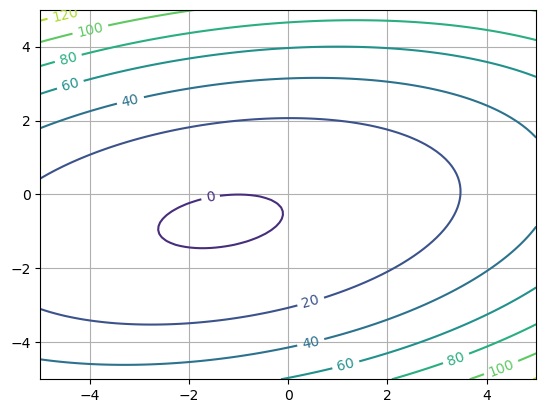

In [4]:
cs = plt.contour(X, Y, Z)
plt.grid(True)
plt.clabel(cs)
None

In [5]:
A = torch.tensor([[1.0, -0.5], [-0.5, 3]])
b = torch.tensor([2.0, 3.0])
c = torch.tensor(1.0)

def f_alt(x): # x: tensor, shape: (2,), ou shape (n, 2), ou shape (m, n, 2)
    xAx = torch.einsum("...i,ij,...j->...", x, A, x)
    bx = torch.einsum("i,...i->...", b, x)
    return xAx + bx + c

In [6]:
x = torch.tensor([1.0, 2.0])
print(f(x[0], x[1]))
print(f_alt(x))

tensor(20.)
tensor(20.)


In [7]:
x = torch.tensor([[1.0, 2.0], [-1.0, 1.0], [1.0, 2.0], [-5.0, -5.0]])
f(x[:,0],x[:,1]) 

tensor([20.,  7., 20., 51.])

In [8]:
f_alt(x)

tensor([20.,  7., 20., 51.])

In [9]:
x = torch.tensor([
    [
        [1.0, 2.0], [-1.0, 1.0]
    ], 
    [
        [1.0, 2.0], [-5.0, -5.0]
    ]
])
f(x[:,:,0],x[:,:,1]) 

tensor([[20.,  7.],
        [20., 51.]])

In [10]:
f_alt(x)

tensor([[20.,  7.],
        [20., 51.]])

In [11]:
x = torch.linspace(-5.0, 5.0, 100)
y = torch.linspace(-5.0, 5.0, 100)
X, Y = torch.meshgrid(x, y, indexing="xy")
XY = torch.stack((X, Y), dim=2)
print(XY.shape)
Z = f_alt(XY)

torch.Size([100, 100, 2])


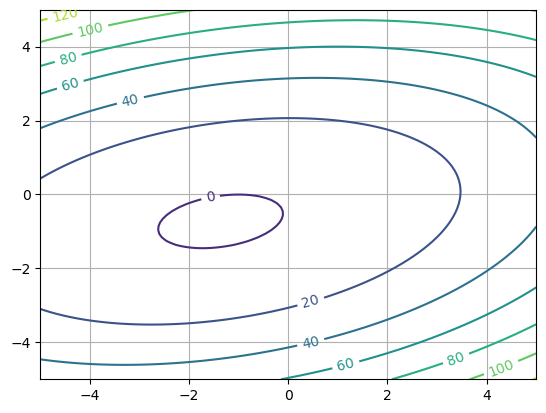

In [12]:
cs = plt.contour(X, Y, Z)
plt.grid(True)
plt.clabel(cs)
None

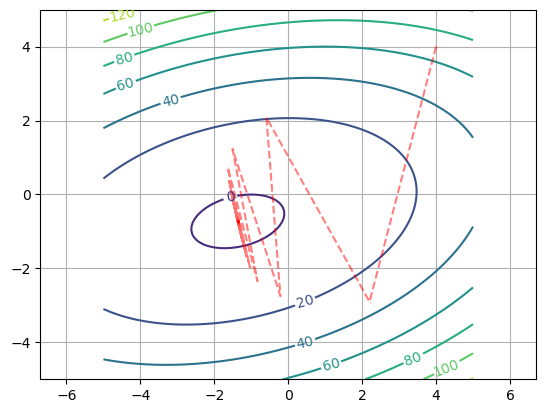

In [13]:
x = torch.tensor([4.0, 4.0], requires_grad=True)
xs = [x.detach().clone()]
lr = 0.3
n = 100
optimizer = torch.optim.SGD(params=[x], lr=lr)
for i in range(n):
    y = f_alt(x)
    y.backward()
    optimizer.step()
    xs.append(x.detach().clone())
    optimizer.zero_grad()
plt.figure()
plt.axis("equal")
cs = plt.contour(X, Y, Z)
plt.grid(True)
plt.clabel(cs)
x1s = [x[0].item() for x in xs]
x2s = [x[1].item() for x in xs]
plt.plot(x1s, x2s, "r--.", ms=0.5, alpha=0.5)
plt.axis("equal")
None

In [14]:
x_star = torch.tensor([-1.3636, -0.7273])

In [15]:
lrs = torch.linspace(0.06, 0.1, 100)
es = []
for lr in lrs:
    x = torch.tensor([4.0, 4.0], requires_grad=True)
    xs = [x.detach().clone()]
    n = 100
    optimizer = torch.optim.SGD(params=[x], lr=lr)
    for i in range(n):
        y = f_alt(x)
        y.backward()
        optimizer.step()
        xs.append(x.detach().clone())
        optimizer.zero_grad()
    e = (xs[-1] - x_star).norm()
    es.append(e)


Text(0, 0.5, 'error')

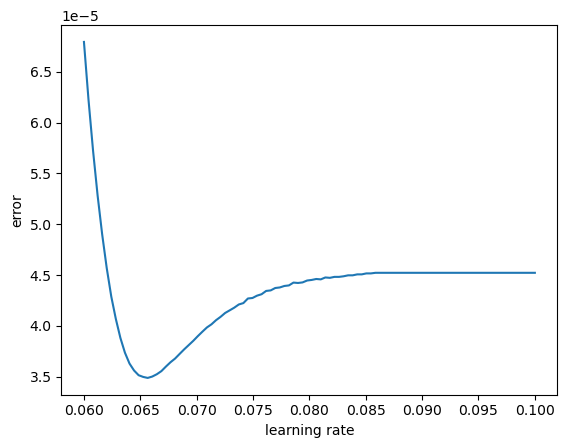

In [16]:
plt.plot(lrs, es)
plt.xlabel("learning rate")
plt.ylabel("error")

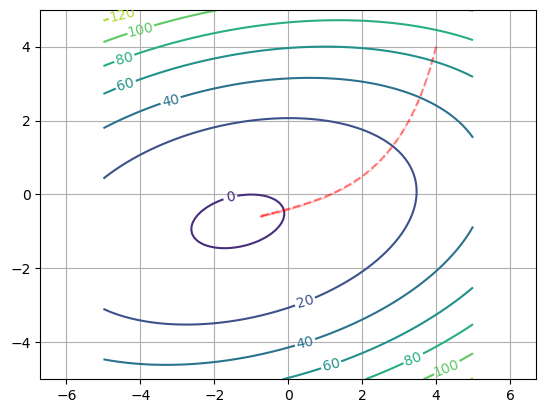

In [17]:
x = torch.tensor([4.0, 4.0], requires_grad=True)
xs = [x.detach().clone()]
lr = 0.065 / 5
n = 100
optimizer = torch.optim.SGD(params=[x], lr=lr)
for i in range(n):
    y = f_alt(x)
    y.backward()
    optimizer.step()
    xs.append(x.detach().clone())
    optimizer.zero_grad()
plt.figure()
plt.axis("equal")
cs = plt.contour(X, Y, Z)
plt.grid(True)
plt.clabel(cs)
x1s = [x[0].item() for x in xs]
x2s = [x[1].item() for x in xs]
plt.plot(x1s, x2s, "r--.", ms=0.5, alpha=0.5)
plt.axis("equal")
None

## Fonction de Rosenbrock

$$
f(x, y)  = (1-x)^2  + 100 (y - x^2)^2
$$

Le minimum est en 

$$
(x^*, y^*) = (1.0, 1.0)
$$

et 

$$
f(x^*, y^*) = 0.0
$$

In [18]:
def banana(xy):
    x = xy[...,0]
    y = xy[...,1]
    a = 1 - x
    b = y - x*x
    return a*a + 100.0 * b*b

torch.Size([100, 100, 2])


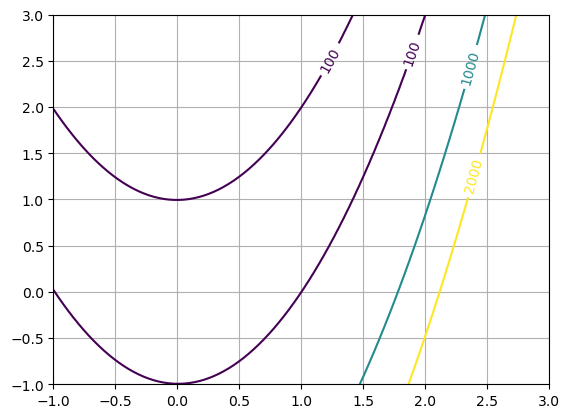

In [19]:
x = torch.linspace(-1.0, 3.0, 100)
y = torch.linspace(-1.0, 3.0, 100)
X, Y = torch.meshgrid(x, y, indexing="xy")
XY = torch.stack((X, Y), dim=2)
print(XY.shape)
Z = banana(XY)
cs = plt.contour(X, Y, Z, levels=[100, 1000, 2000])
plt.clabel(cs)
plt.grid()

torch.Size([1000, 1000, 2])


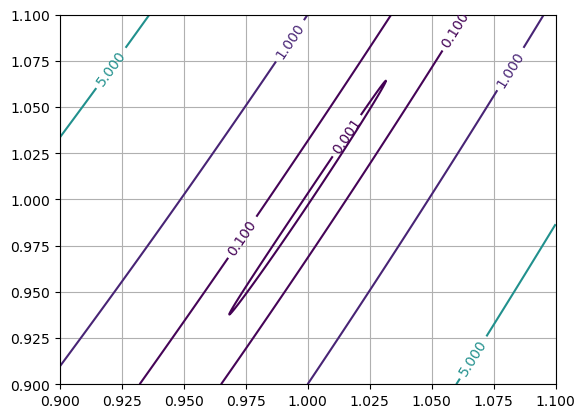

In [20]:
x = torch.linspace(0.9, 1.1, 1000)
y = torch.linspace(0.9, 1.1, 1000)
X, Y = torch.meshgrid(x, y, indexing="xy")
XY = torch.stack((X, Y), dim=2)
print(XY.shape)
Z = banana(XY)
cs = plt.contour(X, Y, Z, levels=[0.001, 0.1, 1, 5, 10])
plt.clabel(cs)
plt.grid()

torch.Size([100, 100, 2])


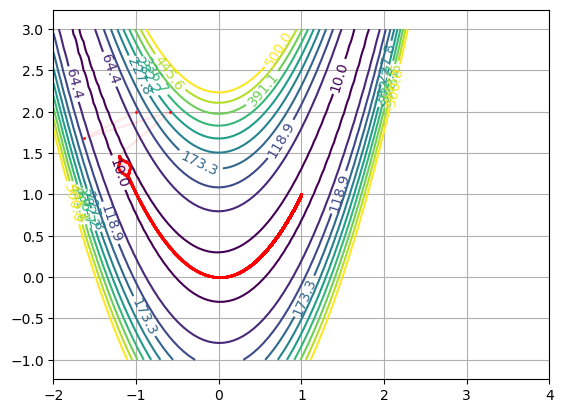

In [23]:
x = torch.tensor([-1.0, 2.0], requires_grad=True)
xs = [x.detach().clone()]
lr = 1.6e-3
n = 100_000
optimizer = torch.optim.SGD(params=[x], lr=lr)
for i in range(n):
    y = banana(x)
    y.backward()
    optimizer.step()
    xs.append(x.detach().clone())
    optimizer.zero_grad()
plt.figure()
plt.axis("equal")
x = torch.linspace(-2.0, 4.0, 100)
y = torch.linspace(-1.0, 3.0, 100)
X, Y = torch.meshgrid(x, y, indexing="xy")
XY = torch.stack((X, Y), dim=2)
print(XY.shape)
Z = banana(XY)
cs = plt.contour(X, Y, Z, levels=torch.linspace(10, 500, 10))
plt.grid(True)
plt.clabel(cs)
x1s = [x[0].item() for x in xs]
x2s = [x[1].item() for x in xs]
plt.plot(x1s, x2s, "r", alpha=0.1)
plt.plot(x1s, x2s, "ro", ms=1.0)
plt.axis("equal")
None

In [22]:
xs[-1]

tensor([1.0000, 1.0000])